In [1]:
print('KALVI KANNAN B')
print('24BAD052')

KALVI KANNAN B
24BAD052


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [4]:
file_path = "LICI - Daily data.csv"

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,"debashis74017/lic-stock-price-data", file_path)
df.head()

100%|██████████| 7.60k/7.60k [00:00<00:00, 6.85MB/s]


,Date,Open,High,Low,Close
0,Tue May 17 2022 00:00:00 GMT+0530 (India Stand...,872.00,918.95,860.00,875.25
1,Wed May 18 2022 00:00:00 GMT+0530 (India Stand...,885.55,891.00,874.10,876.35
2,Thu May 19 2022 00:00:00 GMT+0530 (India Stand...,867.00,867.00,838.00,840.85
3,Fri May 20 2022 00:00:00 GMT+0530 (India Stand...,848.55,856.80,825.00,826.15
4,Mon May 23 2022 00:00:00 GMT+0530 (India Stand...,826.15,852.70,803.65,816.85


In [5]:
df["Price_Movement"] = (df["Close"] > df["Open"]).astype(int)
df.ffill(inplace=True)

In [6]:
X = df[["Open", "High", "Low"]]
y = df["Price_Movement"]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [11]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred, zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy : 0.7
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



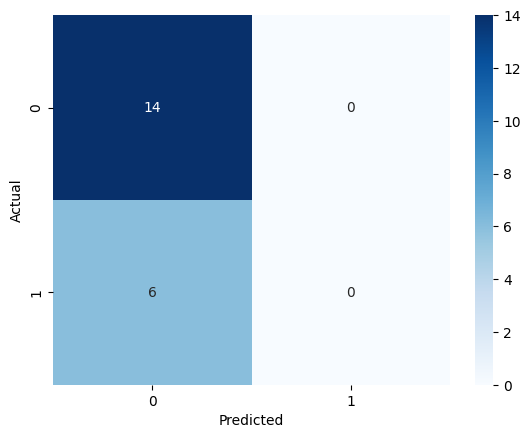

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


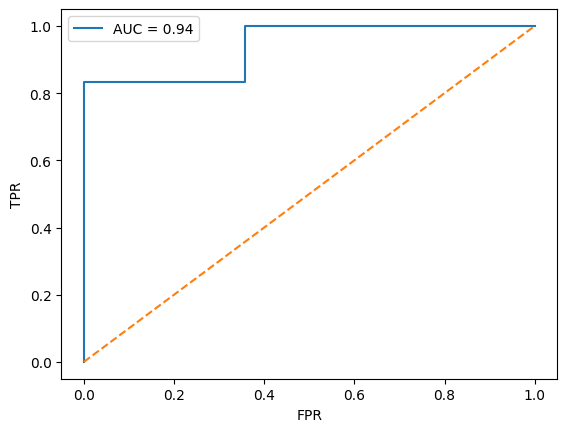

In [14]:
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [15]:
feature_importance = pd.DataFrame({"Feature": X.columns,"Coefficient": model.coef_[0]}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)

  Feature  Coefficient
1    High     0.996090
2     Low     0.309411
0    Open    -1.254235


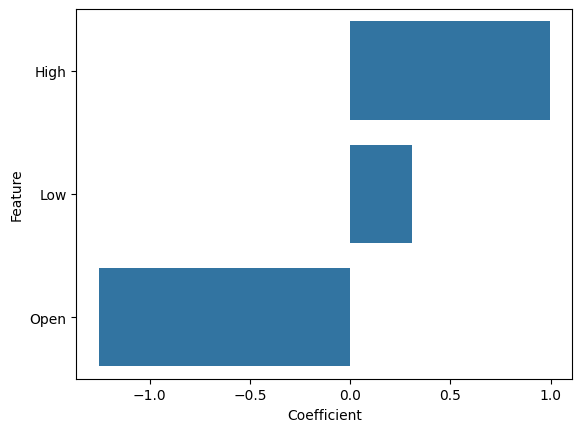

In [16]:
sns.barplot(x="Coefficient", y="Feature", data=feature_importance)
plt.show()

In [17]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100],"penalty": ["l2"],"solver": ["lbfgs"]}

In [18]:
grid = GridSearchCV(LogisticRegression(max_iter=1000),param_grid,cv=5,scoring="f1")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1')

In [19]:
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)

print("Optimized Accuracy :", accuracy_score(y_test, y_best_pred))
print("Optimized Precision:", precision_score(y_test, y_best_pred, zero_division=0))
print("Optimized Recall   :", recall_score(y_test, y_best_pred, zero_division=0))
print("Optimized F1 Score :", f1_score(y_test, y_best_pred, zero_division=0))


Optimized Accuracy : 0.9
Optimized Precision: 1.0
Optimized Recall   : 0.6666666666666666
Optimized F1 Score : 0.8
